In [46]:
import cv2  
import numpy as np

infinity = 10000000000000000000
height=200
width =300
shortest_path = []
blank_image = np.zeros((height,width,3),np.uint8)


# circle
center_coordinates = (225, 50)  
radius = 25
color = (255, 255, 255) 
thickness = -1
blank_image = cv2.circle(blank_image, center_coordinates, radius, color, thickness) 

# Ellipse
blank_image = cv2.ellipse(blank_image, (150,100), (40,20), 0, 
                          0, 360, (255,255,255), thickness) 

# Rhombus
pts = np.array([[225,160],[250,175],[225,190],[200,175]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(blank_image,[pts],True,(255,255,255))
cv2.fillPoly(blank_image, [pts], color=(255, 255, 255))

# Rhombus2
pts = np.array([[75,15],[100,50],[75,80],[50,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(blank_image,[pts],True,(255,255,255))
cv2.fillPoly(blank_image, [pts], color=(255, 255, 255))

#Triangle1
pts = np.array([[25,15],[75,15],[50,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(blank_image,[pts],True,(255,255,255))
cv2.fillPoly(blank_image, [pts], color=(255, 255, 255))

#Triangle2
pts = np.array([[25,15],[50,50],[20,80]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(blank_image,[pts],True,(255,255,255))
cv2.fillPoly(blank_image, [pts], color=(255, 255, 255))

# Rectangle
for x in range(200):
    for y in range(300):
#         print("inside")
        j = x;
        i = 200 - y
        if i - (1.73)*j + 135 > 0 and i + (0.58)*j - 96.35  <= 0 and i - (1.73)*j - 15.54 <= 0 and i + (0.58)*j - 84.81 >= 0:
            blank_image[y,x] = (255,255,255)


cv2.imshow("T",blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

maze = {}
inner_dict = {}

In [31]:
def Area_of_triangle(p1,p2,p3):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    x3 = p3[0]
    y3 = p3[1]
    
    area = (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))/2
    return area
    
    

In [47]:
def check(x,y):
#     print(x*(-3/5)+y+95)
#     print(x*(3/5)+y-175)
#     print(x*(-3/5)+y+125)
#     print(x*(3/5)+y-145)

    
# Rhombus
    if ((x*(-3/5)+y-55<0) and (x*(3/5)+y-325<0) and (x*(-3/5)+y-25>0) and (x*(3/5)+y-295 > 0)):
        return True

# polygon - rhombus
    elif x*(7/5)+y-120 > 0 and x*(-6/5)+y+10 < 0 and x*(6/5)+y-170<0 and x*(-7/5)+y+90>0:
        return True

# polygon - triangle1
    elif y-15 > 0 and x*(7/5)+y-120 < 0 and x*(-7/5)+y+20 < 0:
        return True
    
# polygon - triangle2
    elif y+(13*x)-340 > 0 and x+y-100 < 0 and x*(-7/5)+y+20 > 0:
        return True

# rectangle -angled
#     j = x
#     i = 200 - y
    elif (200-y) - (1.73)*x + 135 > 0 and (200-y) + (0.58)*x - 96.35  <= 0 and (200-y) - (1.73)*x - 15.54 <= 0 and (200-y) + (0.58)*x - 84.81 >= 0:
        return True

    else:
        return False

In [42]:
import math

height=200
width =300

blank_image = np.zeros((height,width,3),np.uint8)


x1 = 0
y1 = 0
x2 = 75
y2 = 0
x3 = 75
y3 = -10
x4 = -10
y4 = 0

theta = math.radians(-30)

x1 = x1 + 95
y1 = y1 + 170
print(x1, y1)
x2 = x2*math.cos(theta) - y2*math.sin(theta) + 95
y2 = x2*math.sin(theta) + y2*math.cos(theta) + 170
print(x2, y2)
x3 = x3*math.cos(theta) - y3*math.sin(theta) + 95
y3 = x3*math.sin(theta) + y3*math.cos(theta) + 170
print(x3, y3)
x4 = x4*math.cos(theta) - y4*math.sin(theta) + 95
y4 = x4*math.sin(theta) + y4*math.cos(theta) + 170
print(x4, y4)

x1 = round(x1)
y1 = round(y1)
x2 = round(x2)
y2 = round(y2)
x3 = round(x3)
y3 = round(y3)
x4 = round(x4)
y4 = round(y4)

print(x1, y1)
print(x2, y2)
print(x3, y3)
print(x4, y4)


blank_image[x1,y1] = (0,255,0)
blank_image[x2,y2] = (0,255,0)
blank_image[x3,y3] = (0,255,0)
blank_image[x4,y4] = (0,255,0)

cv2.imshow("efe",blank_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

95 170
159.9519052838329 90.02404735808356
154.9519052838329 83.86379332023918
86.33974596215562 126.8301270189222
95 170
160 90
155 84
86 127


In [58]:
cx = 0
cy = 0
w = 75
h= 10

x = cx + w/2 * Cos(Phi) - h/2 * Sin(Phi)
y = cy + w/2 * Sin(Phi) + h/2 * Cos(Phi)

NameError: name 'Cos' is not defined

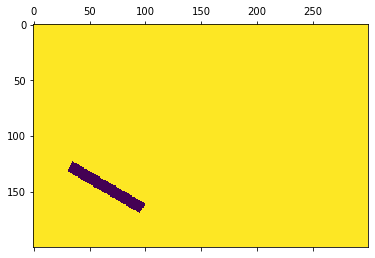

In [63]:
import numpy as np
import copy
import time
import math
import matplotlib.pyplot as plt

coordinates = np.zeros([200, 300])
for i in range(200):
    for j in range(300):

#         if (j-225)**2+(i-150)**2<25**2:
#             coordinates[199-i][j] = 0
#         elif ((j-150)/40)**2+((i-100)/20)**2<1**2:
#             coordinates[199-i][j] = 0
#         elif (j*(-3/5)+i+95)<0 and (j*(3/5)+i-175)<0 and (j*(-3/5)+i+125)>0 and (j*(3/5)+i-145)>0:
#             coordinates[199-i][j] = 0
#         if i-185<0 and j*(-7/5)+i-80>0 and j*(-1)+i-100>0 and j*(-13)+i+140<0:
#             coordinates[199-i][j] = 0
#         if j*(7/5)+i-290<0 and j*(-6/5)+i-30>0 and j*(6/5)+i-210>0 and j*(-7/5)+i-80<0:
#             coordinates[199-i][j] = 0
        if i - (1.73)*j + 135 > 0 and i + (0.58)*j - 96.35  <= 0 and i - (1.73)*j - 15.54 <= 0 and i + (0.58)*j - 84.81 >= 0:
            coordinates[199-i][j] = 0
#         elif j>300 or j<0 or i>200 or i<0:
#             coordinates[199-i][j] = 0
        else:
            coordinates[199-i][j] = 1



# Display matrix
plt.matshow(coordinates)

plt.show()

In [48]:
def obstaclecheck_circle(x,y):
    if ((x-225)**2+(y-50)**2 < 25**2):
        return True
    else:
        return False
    
def obstaclecheck_ellipse(x,y):
    if (((x-150)**2/40**2) + ((y-100)**2)/20**2) <= 1:
        return True
    else:
        return 
    
def obstaclecheck_rhombus(x,y):
    A_up = abs(Area_of_triangle((225,160),(250,175),(200,175)))
    A1 = abs(Area_of_triangle((x,y),(225,160), (250,175)))
    A2 = abs(Area_of_triangle((x,y),(250,175), (200,175)))
    A3 = abs(Area_of_triangle((x,y),(225,160), (200,175)))
    
    A_down = abs(Area_of_triangle((250,175),(200,175),(225,190)))
    A4 = abs(Area_of_triangle((x,y),(250,175), (200,175)))
    A5 = abs(Area_of_triangle((x,y),(200,175), (225,190)))
    A6 = abs(Area_of_triangle((x,y),(250,175), (225,190)))
    
    if (A_up == A1 + A2 + A3):
        return True
    if (A_down == A4 + A5 + A6):
        return True
    else:
        return False
            


In [78]:
print(check(95,165))

True


In [49]:
def top_left(i,j):
#     print("top_left called")
    cost = 1.414
    new_i = i-1
    new_j = j-1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None   
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif ((new_i < 0) or (new_j < 0) or (new_i > width-1) or (new_j > height-1)):
        return None,None,None
    else:
        return cost, new_i, new_j

def top(i,j):
#     print("top called")
    cost = 1
    new_i = i
    new_j = j-1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None 
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1):
        return None,None,None
    else: 
        return cost, new_i, new_j
    
def top_right(i,j):
#     print("top_right called")
    cost = 1.414
    new_i = i+1
    new_j = j-1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1):
        return None,None,None
    else:
        return cost, new_i, new_j
    
def right(i,j):
#     print("right called")
    cost = 1
    new_i = i+1
    new_j = j
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1):
        return None,None,None
    else:
        return cost, new_i, new_j
    
    
def bottom_right(i,j):
#     print("bottom_right called")
    cost = 1.414
    new_i = i+1
    new_j = j+1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif ((new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1) or (new_i >= 0 and new_i <= 2 and new_j >= 1 and new_j <= 2)):
        return None,None,None
    else:
        return cost, new_i, new_j

    
def bottom(i,j):
#     print("bottom called")
    cost = 1
    new_i = i
    new_j = j+1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1 ):
        return None,None,None
    else:
        return cost, new_i, new_j

    
def bottom_left(i,j):
#     print("bottom_left called")

    cost = 1.414
    new_i = i-1
    new_j = j+1
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1):
        return None,None,None
    else:
        return cost, new_i, new_j
    
    
def left(i,j):
#     print("left called")
    cost = 1
    new_i = i-1
    new_j = j
    if obstaclecheck_circle(new_i,new_j):
        return None, None, None
    elif obstaclecheck_ellipse(new_i,new_j):
        return None, None, None
#     elif obstaclecheck_rhombus(new_i,new_j):
#         return None, None, None 
    if check(new_i, new_j):
        return None, None, None
    elif (new_i < 0 or new_j < 0 or new_i > width-1 or new_j > height-1):
        return None,None,None
    else:
        return cost, new_i, new_j

def function(i,j):
    weight1, new_i1, new_j1 = top_left(i, j)
    weight2, new_i2, new_j2 = top(i, j)
    weight3, new_i3, new_j3 = top_right(i, j)
    weight4, new_i4, new_j4 = right(i, j)
    weight5, new_i5, new_j5 = bottom_right(i, j)
    weight6, new_i6, new_j6 = bottom(i, j)
    weight7, new_i7, new_j7 = bottom_left(i, j)
    weight8, new_i8, new_j8 = left(i, j)

    if (weight1 != None):
        inner_dict[(new_i1, new_j1)] = weight1
        maze[(i,j)] = inner_dict
    if (weight2 != None):
        inner_dict[(new_i2, new_j2)] = weight2
        maze[(i,j)] = inner_dict
    if (weight3 != None):
        inner_dict[(new_i3, new_j3)] = weight3
        maze[(i,j)] = inner_dict
    if (weight4 != None):
        inner_dict[(new_i4, new_j4)] = weight4
        maze[(i,j)] = inner_dict
    if (weight5 != None):
        inner_dict[(new_i5, new_j5)] = weight5
        maze[(i,j)] = inner_dict
    if (weight6 != None):
        inner_dict[(new_i6, new_j6)] = weight6
        maze[(i,j)] = inner_dict
    if (weight7 != None):
        inner_dict[(new_i7, new_j7)] = weight7
        maze[(i,j)] = inner_dict
    if (weight8 != None):
        inner_dict[(new_i8, new_j8)] = weight8
        maze[(i,j)] = inner_dict
  

for i in range(width):
    for j in range(height):
        inner_dict = {}
        function(i,j)

In [50]:
def dijkstra(maze,start,goal):
    dist_from_start = {}
    parent_node = {}
    Allnodes = maze
    infinity = 1000000000
    shortest_path = []
    for node in Allnodes:
        dist_from_start[node] = infinity
    dist_from_start[start] = 0
    flag = 0
 
    while (Allnodes and (flag != 1)):
        minNode = None
        for node in Allnodes:
            if minNode is None:
                minNode = node
            elif dist_from_start[node] < dist_from_start[minNode]:
                minNode = node
                x = minNode[0]
                y = minNode[1]
#                 print(x)
#                 print(y)
                v = goal[0]
                w = goal[1]
                if minNode != goal:
                    blank_image[y,x] = (0,0,255)
                    cv2.namedWindow('T',cv2.WINDOW_NORMAL)
                    cv2.resizeWindow('T', 1000,500)
                    cv2.imshow("T", blank_image)
                    cv2.waitKey(1)
                else:
                    flag = 1
           


        for childNode, cost in maze[minNode].items():
            if cost + dist_from_start[minNode] < dist_from_start[childNode]:
                dist_from_start[childNode] = cost + dist_from_start[minNode]
                parent_node[childNode] = minNode
        Allnodes.pop(minNode)
    cv2.destroyAllWindows()
 
    currentNode = goal
    while currentNode != start:
        try:
            shortest_path.insert(0,currentNode)
            currentNode = parent_node[currentNode]
        except KeyError:
            print('shortest_path not reachable')
            break
    shortest_path.insert(0,start)
    if dist_from_start[goal] != infinity:
        print('Shortest distance is ' + str(dist_from_start[goal]))
        print('And the shortest_path is ' + str(shortest_path))
        for path in short_path:
            x = path[0]
            y = path[1]
            blank_image[y,x] = (0,255,0)
            cv2.namedWindow('T',cv2.WINDOW_NORMAL)
            cv2.resizeWindow('T', 1000,500)
            cv2.imshow("T",blank_image)
            cv2.waitKey(50)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return shortest_path


 
cv2.destroyAllWindows()
import time
start_time = time.time()
short_path = dijkstra(maze ,(5,5), (295,195))
print("--- %s seconds ---" % (time.time() - start_time))

Shortest distance is 368.65999999999786
And the shortest_path is [(5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 5), (17, 5), (18, 5), (19, 5), (20, 6), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (28, 7), (29, 7), (30, 7), (31, 7), (32, 7), (33, 7), (34, 7), (35, 7), (36, 7), (37, 8), (38, 8), (39, 8), (40, 8), (41, 8), (42, 8), (43, 8), (44, 8), (45, 8), (46, 8), (47, 8), (48, 8), (49, 8), (50, 8), (51, 8), (52, 8), (53, 8), (54, 8), (55, 8), (56, 8), (57, 8), (58, 8), (59, 8), (60, 8), (61, 8), (62, 8), (63, 8), (64, 8), (65, 8), (66, 8), (67, 8), (68, 8), (69, 8), (70, 8), (71, 8), (72, 8), (73, 8), (74, 8), (75, 8), (76, 8), (77, 8), (78, 8), (79, 8), (80, 8), (81, 8), (82, 8), (83, 8), (84, 8), (85, 8), (86, 8), (87, 8), (88, 8), (89, 8), (90, 8), (91, 8), (92, 8), (93, 8), (94, 8), (95, 8), (96, 8), (97, 8), (98, 8), (99, 8), (100, 8), (101, 8), (102, 8), (103, 8), (104, 8), (105, 8), (106, 8), (107, 8), (108

In [12]:
for path in short_path:
    x = path[0]
    y = path[1]
    blank_image[y,x] = (0,255,0)
    cv2.namedWindow('T',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('T', 1000,500)
    cv2.imshow("T",blank_image)
    cv2.waitKey(50)


cv2.destroyAllWindows()
    

In [ ]:
cv2.imshow("efe", blank_image)
cv2.waitKey(0)
cv2.destoryAllWindows()